In [9]:
import matplotlib.pyplot as plt
import networkx as nx


def read_input():
    with open("input.txt") as f:
        gates, ops = f.read().split('\n\n')

        numbers = {}
        for i in gates.splitlines():
            var, n = i.split(': ')
            numbers[var] = int(n)

        ops_final = []
        for i in ops.splitlines():
            ops_final.append(i.split(' '))

        return numbers, ops_final


numbers, ops = read_input()
G = nx.DiGraph(directed=True)
ops_dict = {}
for op in ops:
    G.add_edge(op[0], op[4])
    G.add_edge(op[2], op[4])
    ops_dict[op[4]] = op[0:3]

# PART1

In [10]:
OPS_DICT = {
    'AND': lambda x,y: x & y,
    'OR': lambda x,y: x | y,
    'XOR': lambda x,y: x ^ y,
}
for layer, nodes in enumerate(nx.topological_generations(G)):
    for node in nodes:
        G.nodes[node]["layer"] = layer
        if layer > 0:
            var1, operator, var2 = ops_dict[node]
            n1, n2 = numbers[var1], numbers[var2]
            numbers[node] = OPS_DICT[operator](n1, n2)

s = ''
for number in sorted(numbers, reverse=True):
    if number.startswith('z'):
        digit = str(numbers[number])
        # print(number, digit)
        s+=digit
print(f'{s} => {int(s, 2)}')

001001 => 9


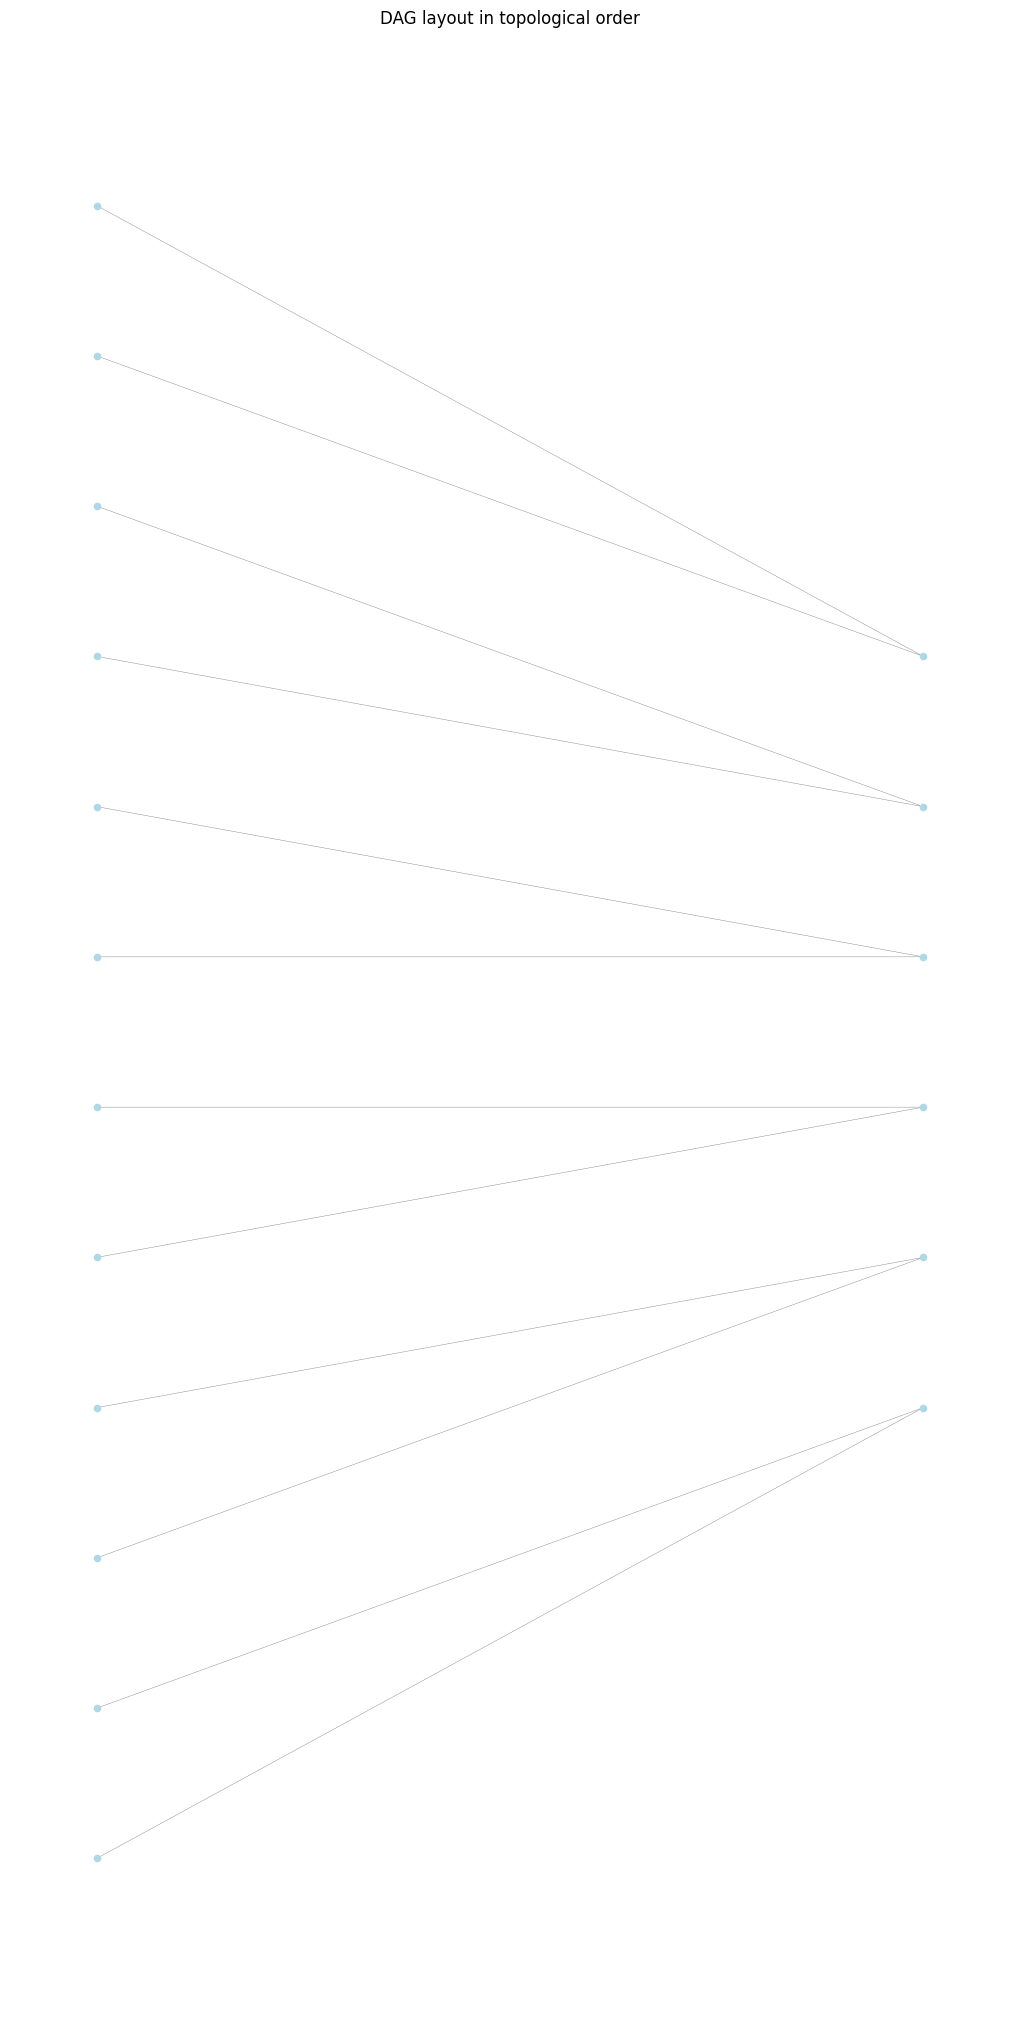

In [11]:
plt.figure(figsize=(10,20)) 
nx.draw(
    G,
    node_size=20,
    node_color='lightblue',
    edge_color='gray',
    width=0.3,
    arrows=True,
    arrowsize=0.1,
    pos=nx.multipartite_layout(G, subset_key="layer")
)
plt.title("DAG layout in topological order")
plt.show()

# Part2

In [44]:
def get_sumbin(numbers, starting):
    s = ''
    sn = [n for n in numbers if n.startswith(starting)]
    for number in sorted(sn, reverse=True):
        digit = str(numbers[number])
        s+=digit
    i = int(s, 2)
    print(f'{starting}: {s} => {i}')
    return i

In [45]:
total = 0
left = get_sumbin(numbers,'x')
right = get_sumbin(numbers,'y')
total = left&right
b = bin(total).lstrip('0b')
print(f'Total: {total}. All z should be {b}')
z_numbers = [n for n in numbers if n.startswith('z')]
for i, n in enumerate(sorted(z_numbers, reverse=True)):
    real = str(numbers[n])
    digit = b[i]
    print(f'{n} should be {digit}')
        # if digit!=real:
            # print(f'{number} should be {digit}, but it is {numbers[number]}')


x: 101010 => 42
y: 101100 => 44
Total: 40. All z should be 101000
z05 should be 1
z04 should be 0
z03 should be 1
z02 should be 0
z01 should be 0
z00 should be 0


In [41]:
{n: numbers[n] for n in z_numbers}

{'z05': 0, 'z02': 0, 'z01': 0, 'z03': 1, 'z04': 0, 'z00': 1}